# Social Media Analysis

**Objetives**: Collecting, cleaning and analyzing data on social media posts.

Extra: Implementation a very simple machine-learning example.


For this project, a synthetic Twitter-like dataset was created. **Run the cell bellow only if you haven't generated the dataset yet**.  It will execute the generator script located at `../src/generate_dataset.py` and create `../data/tweets_synthetic.csv`.

In [277]:
!python ../src/generate_dataset.py

Dataset generated successfully at ../data/tweets_synthetic.csv
   user_id       category  followers  ... likes  retweets  viral
0      103  Entertainment      63670  ...   105        14  False
1      180       Politics      48924  ...   108        18   True
2       93         Sports      49758  ...   119         8  False
3       15       Politics      74603  ...   145        15  False
4      107         Sports      68394  ...   126         4  False
5       72       Politics      49188  ...    97         5  False
6      189           Tech      54352  ...    93        10  False
7       21         Sports      47688  ...    94        12  False
8      103           Tech      78299  ...   168        20  False
9      122  Entertainment       2769  ...     3         0  False

[10 rows x 8 columns]


In [278]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data into a Pandas DataFrame and explore the data

In [279]:
data_path = "../data/tweets_synthetic.csv"
df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head(10)

Shape: (1000, 8)


,user_id,category,followers,sentiment,posted_hour,likes,retweets,viral
0,103,Entertainment,63670,negative,21,105,14,False
1,180,Politics,48924,negative,4,108,18,True
2,93,Sports,49758,neutral,2,119,8,False
3,15,Politics,74603,negative,11,145,15,False
4,107,Sports,68394,negative,12,126,4,False
5,72,Politics,49188,negative,12,97,5,False
6,189,Tech,54352,negative,9,93,10,False
7,21,Sports,47688,negative,3,94,12,False
8,103,Tech,78299,negative,8,168,20,False
9,122,Entertainment,2769,positive,21,3,0,False


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      1000 non-null   int64 
 1   category     970 non-null    object
 2   followers    1000 non-null   int64 
 3   sentiment    970 non-null    object
 4   posted_hour  1000 non-null   int64 
 5   likes        1000 non-null   int64 
 6   retweets     1000 non-null   int64 
 7   viral        1000 non-null   bool  
dtypes: bool(1), int64(5), object(2)
memory usage: 55.8+ KB


In [281]:
df.describe()

,user_id,followers,posted_hour,likes,retweets
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,101.272000,5.999730e+04,11.827000,133.921000,9.939000
std,57.319836,1.404845e+05,6.969767,476.980571,6.510427
min,1.000000,2.130000e+02,0.000000,0.000000,0.000000
25%,51.000000,2.675125e+04,6.000000,52.000000,5.000000
50%,103.500000,4.929900e+04,12.000000,100.000000,9.000000
75%,149.000000,7.475800e+04,18.000000,149.000000,15.000000
max,199.000000,1.999840e+06,23.000000,6810.000000,33.000000


In [282]:
df[['followers','likes','retweets']].describe()

,followers,likes,retweets
count,1.000000e+03,1000.000000,1000.000000
mean,5.999730e+04,133.921000,9.939000
std,1.404845e+05,476.980571,6.510427
min,2.130000e+02,0.000000,0.000000
25%,2.675125e+04,52.000000,5.000000
50%,4.929900e+04,100.000000,9.000000
75%,7.475800e+04,149.000000,15.000000
max,1.999840e+06,6810.000000,33.000000


Viral tweets count:
 viral
False    891
True     109
Name: count, dtype: int64


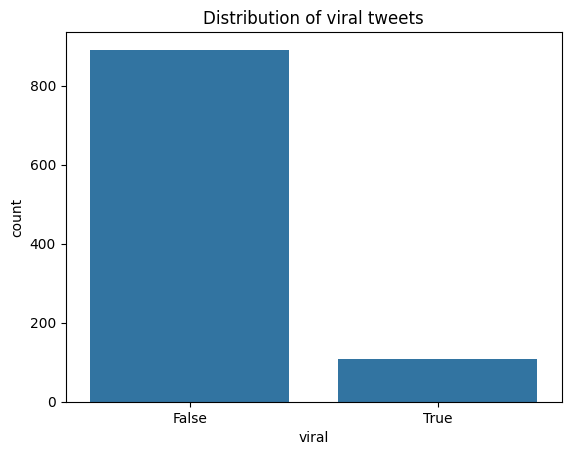

In [283]:
print('Viral tweets count:\n', df["viral"].value_counts())

sns.countplot(data = df, x="viral")
plt.title('Distribution of viral tweets')
plt.show()

Category counts:
 category
Entertainment    258
Politics         246
Tech             246
Sports           220
Name: count, dtype: int64


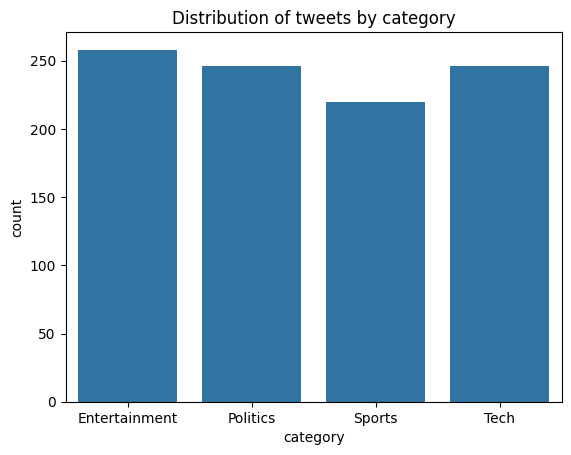

In [284]:
print('Category counts:\n', df['category'].value_counts())

sns.countplot(data=df, x='category')
plt.title('Distribution of tweets by category')
plt.show()


Sentiment counts:
 sentiment
negative    439
neutral     297
positive    234
NaN          30
Name: count, dtype: int64


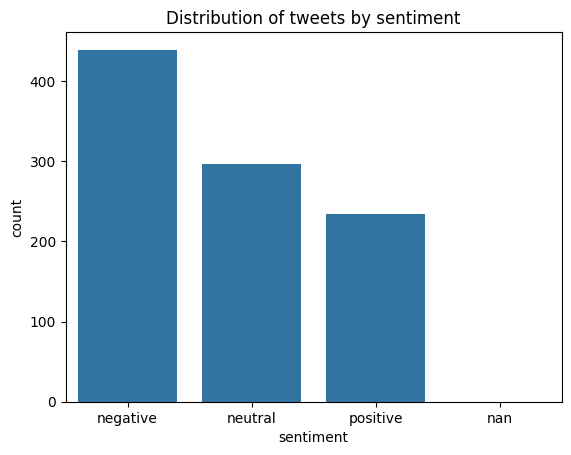

In [285]:
print('\nSentiment counts:\n', df['sentiment'].value_counts(dropna=False))

sns.countplot(data=df, x='sentiment', order=df['sentiment'].value_counts(dropna=False).index)
plt.title('Distribution of tweets by sentiment')
plt.show()

In [286]:
print('Missing values per column:\n', df.isnull().sum())

Missing values per column:
 user_id         0
category       30
followers       0
sentiment      30
posted_hour     0
likes           0
retweets        0
viral           0
dtype: int64


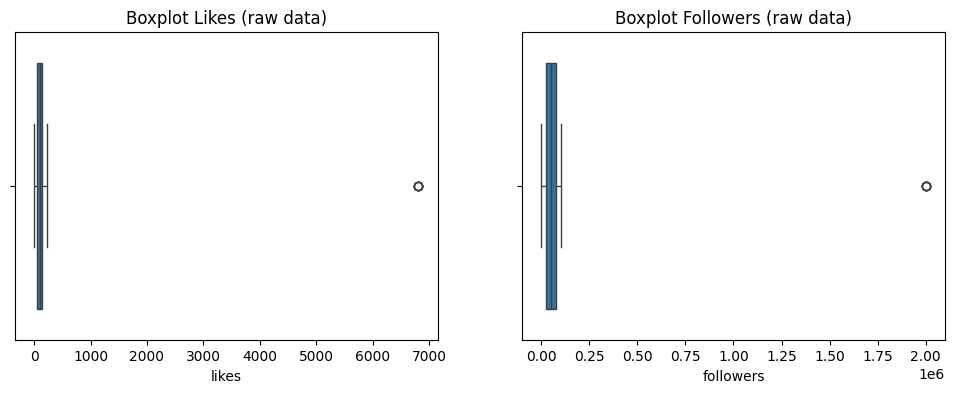

In [287]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x=df['likes'], ax=axes[0])
axes[0].set_title('Boxplot Likes (raw data)')
sns.boxplot(x=df['followers'], ax=axes[1])
axes[1].set_title('Boxplot Followers (raw data)')
plt.show()

## Clean the data

Remove the null values:

In [288]:
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['category', 'sentiment']).reset_index(drop=True)

print('\nRows before dropna:', df.shape)
print('\nRows after dropna:', df_clean.shape)


Rows before dropna: (1000, 8)

Rows after dropna: (940, 8)


In [300]:
print('Missing values per column:\n', df_clean.isnull().sum())

Missing values per column:
 user_id        0
category       0
followers      0
sentiment      0
posted_hour    0
likes          0
retweets       0
viral          0
dtype: int64



Sentiment counts:
 sentiment
negative    424
neutral     289
positive    227
Name: count, dtype: int64


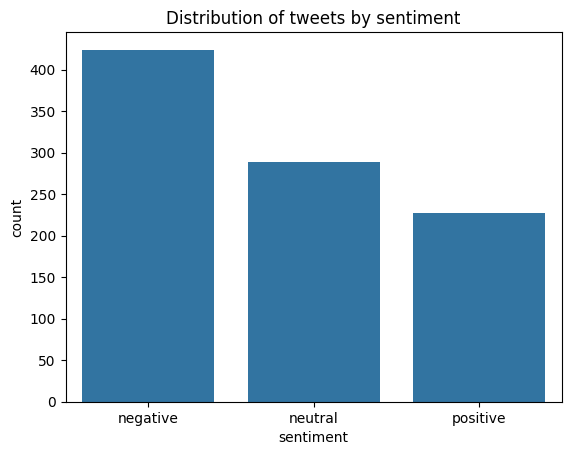

In [289]:
# Sentiment distribution
print('\nSentiment counts:\n', df_clean['sentiment'].value_counts(dropna=False))

sns.countplot(data=df_clean, x='sentiment', order=df_clean['sentiment'].value_counts(dropna=False).index)
plt.title('Distribution of tweets by sentiment')
plt.show()

Viral tweets count:
 viral
False    838
True     102
Name: count, dtype: int64


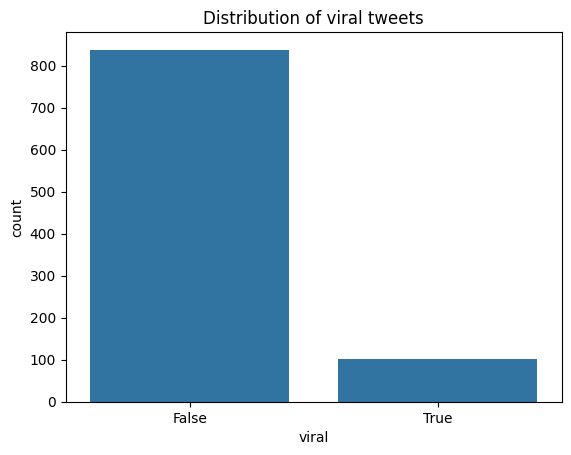

In [290]:
print('Viral tweets count:\n', df_clean["viral"].value_counts())

sns.countplot(data = df_clean, x="viral")
plt.title('Distribution of viral tweets')
plt.show()

Adjust outliers to a limit based on the 95th percentile:

In [291]:
max_followers = df_clean['followers'].quantile(0.95)
max_likes = df_clean['likes'].quantile(0.95)
print(f"Max followers adjusted value = {max_followers}, Max likes adjusted value = {max_likes}")

df_clean['followers'] = df_clean['followers'].clip(upper=max_followers)
df_clean['likes'] = df_clean['likes'].clip(upper=max_likes)

Max followers adjusted value = 95384.79999999999, Max likes adjusted value = 194.0


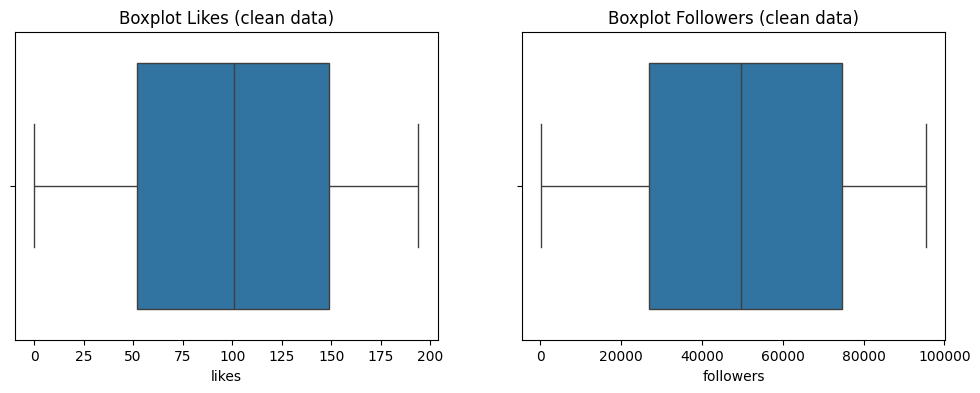

In [292]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x=df_clean['likes'], ax=axes[0])
axes[0].set_title('Boxplot Likes (clean data)')
sns.boxplot(x=df_clean['followers'], ax=axes[1])
axes[1].set_title('Boxplot Followers (clean data)')
plt.show()

## Visualization and Analysis

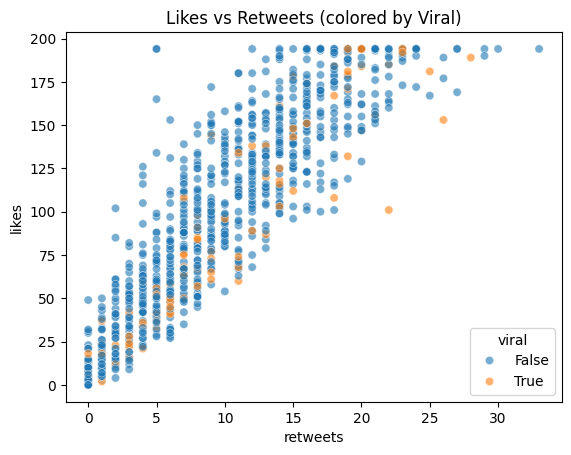

In [293]:
sns.scatterplot(
    data=df_clean,
    x="retweets",
    y="likes",
    hue="viral",
    alpha=0.6
)
plt.title("Likes vs Retweets (colored by Viral)")
plt.show()

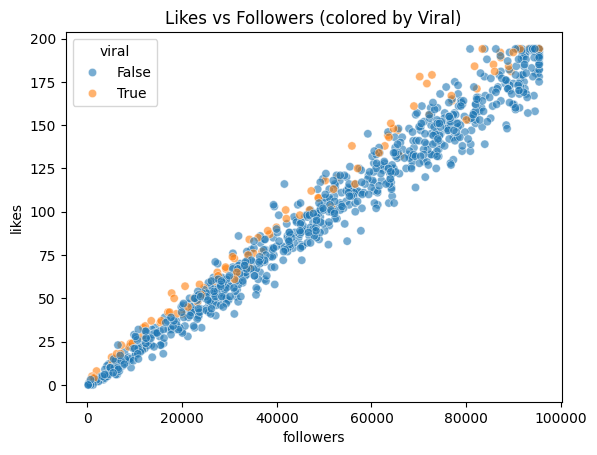

In [294]:
sns.scatterplot(
    data=df_clean,
    x="followers",
    y="likes",
    hue="viral",
    alpha=0.6
)
plt.title("Likes vs Followers (colored by Viral)")
plt.show()

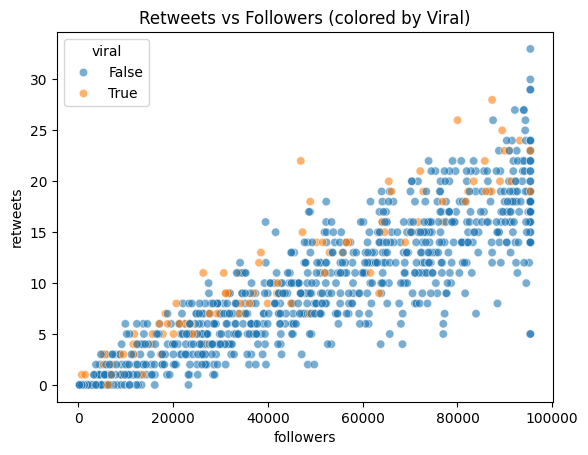

In [295]:
sns.scatterplot(
    data=df_clean,
    x="followers",
    y="retweets",
    hue="viral",
    alpha=0.6
)
plt.title("Retweets vs Followers (colored by Viral)")
plt.show()

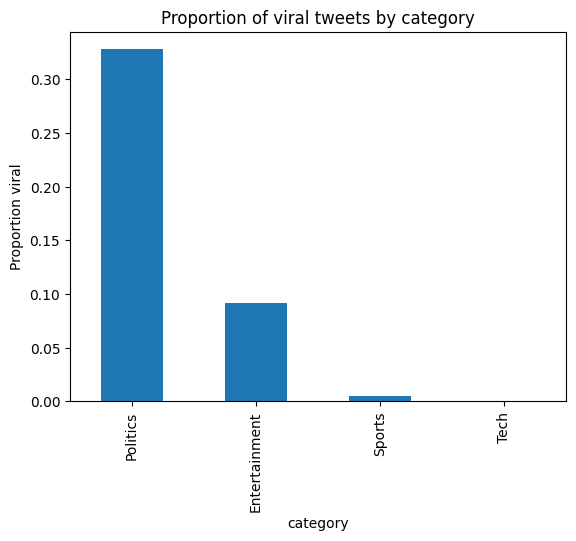

In [296]:
# Proportion of viral tweets by category
df_clean.groupby('category')['viral'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Proportion viral')
plt.title('Proportion of viral tweets by category')
plt.show()

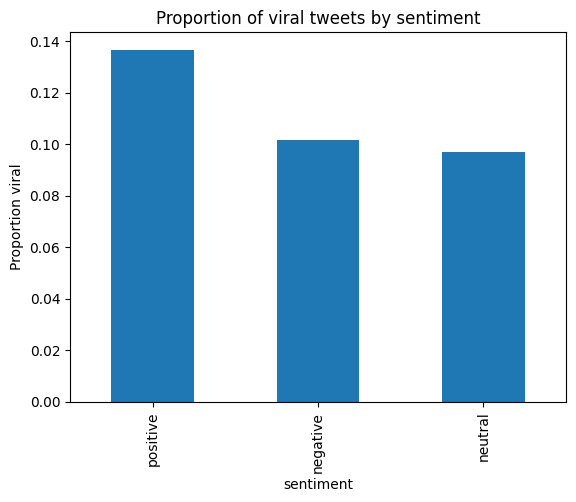

In [297]:
# Proportion of viral tweets by sentiment
df_clean.groupby('sentiment')['viral'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Proportion viral')
plt.title('Proportion of viral tweets by sentiment')
plt.show()

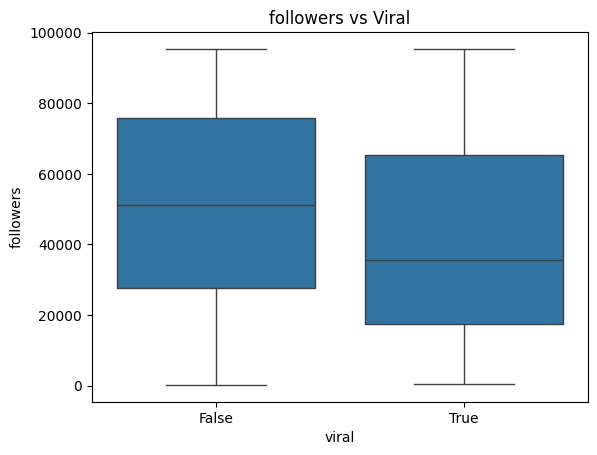

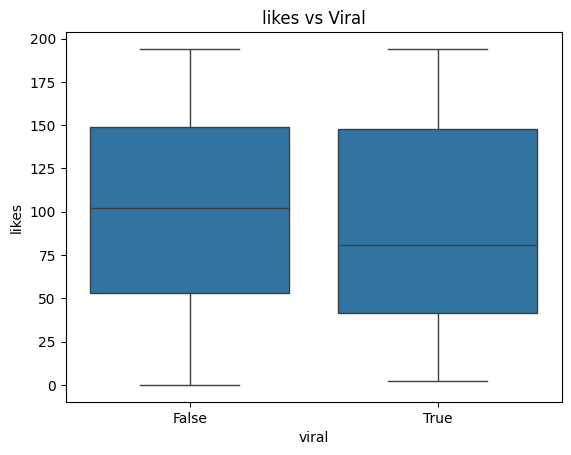

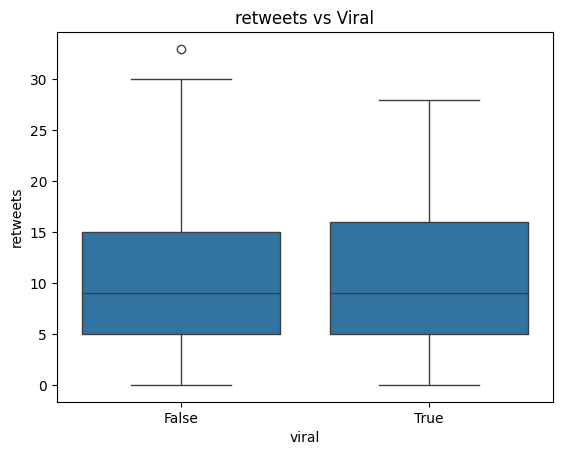

In [298]:
numeric_cols = ['followers', 'likes', 'retweets']

for col in numeric_cols:
    sns.boxplot(x='viral', y=col, data=df_clean)
    plt.title(f'{col} vs Viral')
    # plt.yscale('log')  # opcional si hay outliers muy grandes
    plt.show()

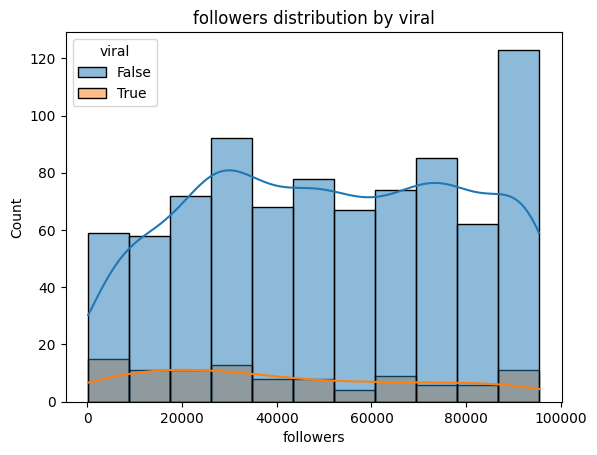

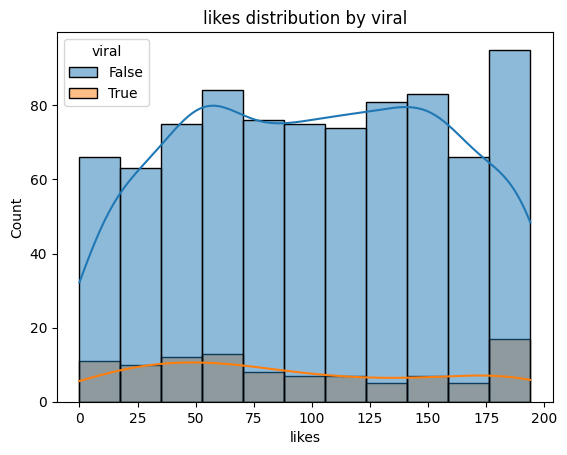

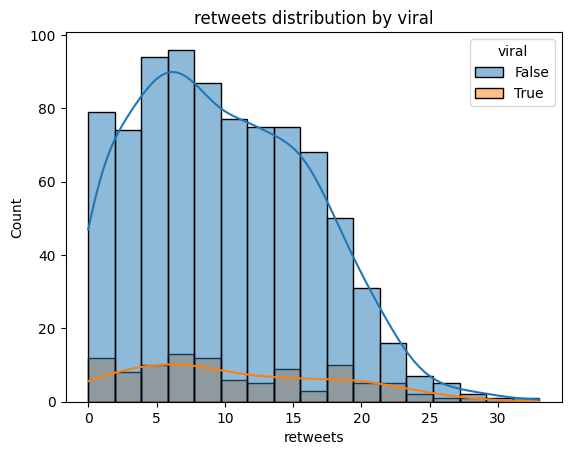

In [301]:
for col in numeric_cols:
    sns.histplot(data=df_clean, x=col, hue='viral', kde=True)
    plt.title(f'{col} distribution by viral')
    plt.show()

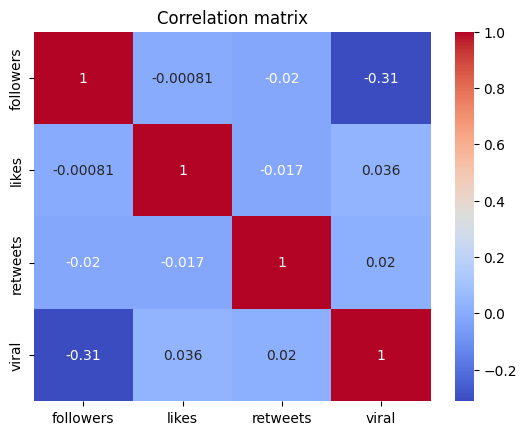

In [ ]:
corr = df_clean[['followers','likes','retweets','viral']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()